In [1]:
%matplotlib inline

import pandas as pd
import scipy.optimize as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

data = pd.read_csv("/home/jack/Code/UCSB129L/Roten-8831794-hw7/straightTracks.txt", sep=" ") 
data.columns = ['X0','Y0','y00','y01','y02','y03','y10','y11','y12','y13','0']

In [2]:
#data
#sorted(data['y00'])
#These values go roughly from -2 tp 2
# this doesn't make a whole lot of sence since

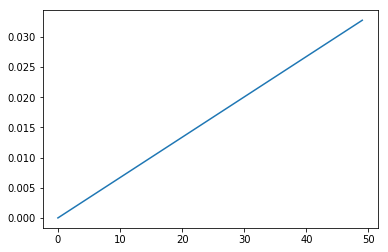

In [3]:
X = data['X0'][1] - data['X0'][0]
y = data['y01'][1] - data['y01'][0]
m = X/y
f = np.linspace(0,10)*m
plt.plot(f)
plt.show()

In [4]:
## aquire a y value from y00 and then using some 
# triangle identies to calculate how far away 
# an x-axis intercept is


Text(0.5, 1.0, 'y03')

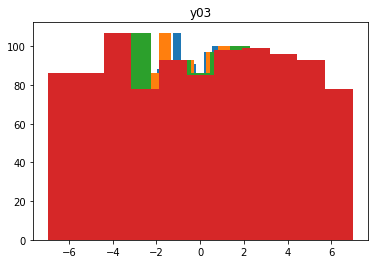

In [5]:
y00 = plt.hist(data['y00'], bins ='auto')
plt.hist(data['y01'], bins ='auto')
plt.hist(data['y02'], bins ='auto')
plt.hist(data['y03'], bins ='auto')
plt.title('y00, y01, y02, y03')
# the distances of the the plates are 2,3,5,7
# This is looking promising, I now have a good 
# distrubution of data graphed on the histogram.
# The odd thing is that I 

# maybe I should take the point from the last set of data?

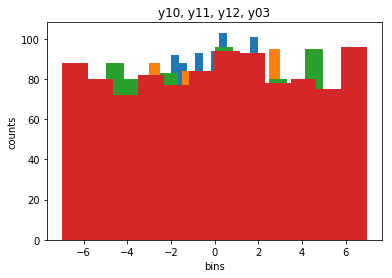

In [10]:
y10 = plt.hist(data['y10'], bins = 11)
y11 = plt.hist(data['y11'], bins =12)
y12 = plt.hist(data['y12'], bins =12)
y13 = plt.hist(data['y13'], bins =12)
plt.title('y10, y11, y12, y03')
plt.xlabel('bins')
plt.ylabel('counts')
plt.show()
# This number of bins is determined from using the 
# bins = 'auto' parameter, then playing around with
# the number of bins to get observable peaks.
# Now take the middle value of each bin with the greatest
# number of counts

In [29]:
x0=2
x1=3
x2=5
x3=7
for i in range(len(y10[0])):
    print('bin count: ', y10[0][i], 'at', y10[1][i])

# now wish to extract a value out of the histograms

bin count:  92.0 at -1.9973583377179256
bin count:  88.0 at -1.6346310649906521
bin count:  81.0 at -1.2719037922633785
bin count:  93.0 at -0.909176519536105
bin count:  84.0 at -0.5464492468088313
bin count:  94.0 at -0.18372197408155766
bin count:  103.0 at 0.17900529864571557
bin count:  89.0 at 0.5417325713729892
bin count:  87.0 at 0.9044598441002629
bin count:  87.0 at 1.2671871168275366
bin count:  101.0 at 1.6299143895548103


In [ ]:
# I want to extract the x value(max signal on plate)
# and make that the y component in our original 
# system

In [ ]:
## Need to fit the coordinates of each track to a straight line. Use either np.polyfit/ curve_fit from scipy
# optimize
# Maybe look for the spot that the particle seems to be most localized on the ditribution , then 

from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# read data from a text file. One number per line
#arch = data['y00']
datos = data['y00']
#for item in len(arch):
#    item = item.strip()
#   if item != '':
#        try:
#           datos.append(float(item))
#        except ValueError:
#           pass

# best fit of data
(mu, sigma) = norm.fit(datos)

# the histogram of the data
n, bins, patches = plt.hist(datos, 250, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('bins')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

## This does not work for my purposes...

In [ ]:
## I need to somehow extract the most common bin range.
# what if created a varying range which went from the 
# one point in a bin, to two points in a bin, to three
# points in a bin, etc. to one whole bin.
# 
avgs = data['y00']
bins = np.array([-2, -1, 0, 1, 2])
binplace = np.digitize(avgs, bins, right=False)
binplace
